# Structure Characterization

In [28]:
%load_ext autoreload
%autoreload 2

import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import glob
from matplotlib.ticker import ScalarFormatter

from sro_sto_plume.coordinate_converter import convert_top_left_origin_to_matplotlib
from sro_sto_plume.xrd_ref import calculate_2theta, plot_ref_xrd
from m3util.viz.layout import layout_fig, layout_subfigures_inches
from m3util.viz.text import labelfigs, add_text_to_figure
from m3util.viz.lines import draw_lines
from xrd_learn.xrd_viz import plot_xrd
from xrd_learn.xrd_utils import detect_peaks, calculate_fwhm, load_xrd_scans, align_peak_to_value
from xrd_learn.rsm_viz import RSMPlotter
from afm_learn.afm_viz import visualize_afm_image
from afm_learn.afm_utils import parse_ibw, format_func

colors = colormaps.get_cmap('tab10').colors[:5]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. AFM

## 2. XRD

ValueError: too many values to unpack (expected 1)

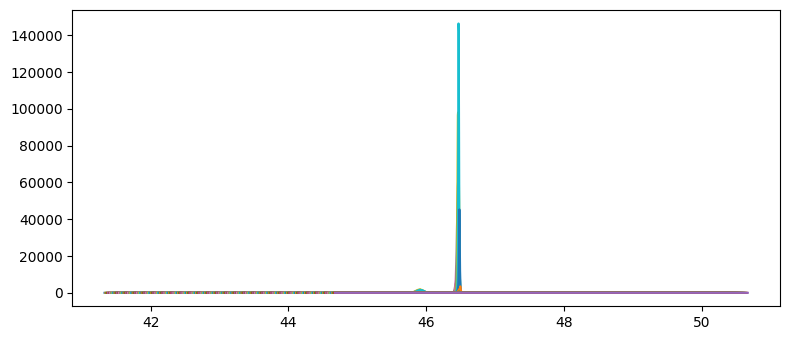

In [ ]:
files = [,
         ]
sample_names = ['Sample X']
Xs, Ys, length_list = load_xrd_scans(files)
fig, ax = layout_fig(graph=1, mod=1, figsize=(8, 3.5), layout='tight')
plot_xrd((Xs, Ys, length_list), sample_names, title='XRD Scans', xrange=(42.8, 49.8), yrange=(1, 1e18), diff=1e2, fig=fig, ax=ax, legend_style='label', text_offset_ratio=(1.001, 0.45))

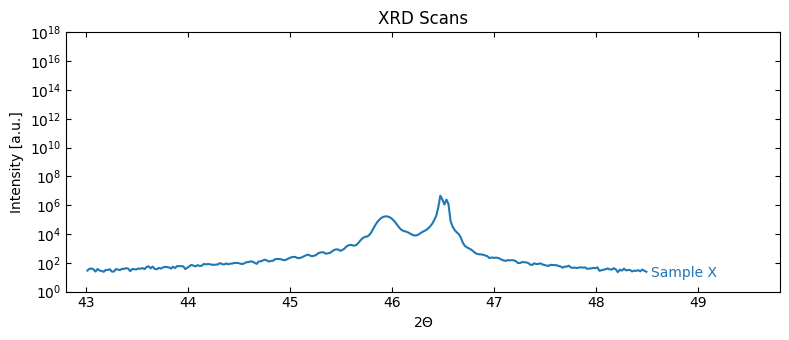

In [18]:
files = ['../data/XRD_RSM/YG063/YG063 2theta-Omega_Path1_42-49 degree_slow_2.xrdml',
         ]
sample_names = ['Sample X']
Xs, Ys, length_list = load_xrd_scans(files)
fig, ax = layout_fig(graph=1, mod=1, figsize=(8, 3.5), layout='tight')
plot_xrd((Xs, Ys, length_list), sample_names, title='XRD Scans', xrange=(42.8, 49.8), yrange=(1, 1e18), diff=1e2, fig=fig, ax=ax, legend_style='label', text_offset_ratio=(1.001, 0.45))

In [19]:
files = ['../data/XRD_RSM/YG063/YG063 2theta-Omega_Path1_42-49 degree_slow_2.xrdml',
        '../data/XRD_RSM/YG065/YG065_2theta-Omega_Path1_42-49 degree_slow_2.xrdml',
         '../data/XRD_RSM/YG066/YG066 2theta-Omega_Path1_42-49 degree_slow_2.xrdml',
         '../data/XRD_RSM/YG067/YG067 2theta-Omega_Path1_42-49 degree_slow_2 1.xrdml',
         '../data/XRD_RSM/YG068/YG068 2theta-Omega_Path1_42-49 degree_slow_2.xrdml',
         '../data/XRD_RSM/YG069/YG069 2theta-Omega_Path1_42-49 degree_slow_2.xrdml',
         ]
sample_names = ['Sample X', 'Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5']

Xs, Ys, length_list = load_xrd_scans(files)

### 1.1 Visualize XRD

In [20]:
# Example: SrTiO3 (002) reflection
two_theta_value = calculate_2theta(hkl=(0, 0, 2), abc=(3.905, 3.905, 3.905))
print(f"2θ for STO (002) reflection: {two_theta_value:.4f}°")

two_theta_value = calculate_2theta(hkl=(2, 2, 0), abc=(5.567, 5.530, 7.845))
print(f"2θ for SRO (220) reflection: {two_theta_value:.4f}°")

2θ for STO (002) reflection: 46.4721°
2θ for SRO (220) reflection: 46.2425°


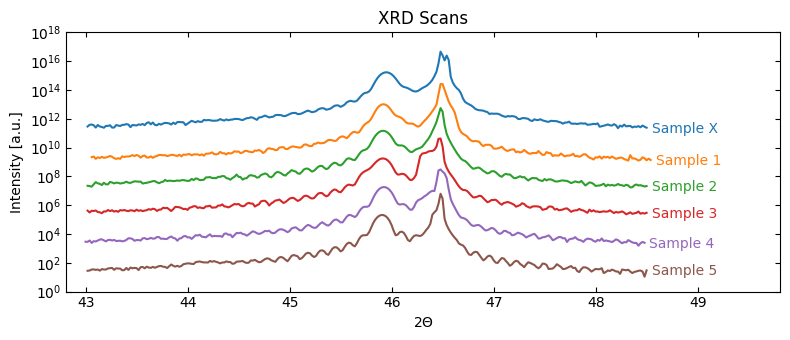

In [22]:
STO_x_peak = 46.4721
SRO_bulk_x_peak = 46.2425

Xs_aligned, Ys_aligned = align_peak_to_value(Xs, Ys, STO_x_peak, viz=False)
fig, ax = layout_fig(graph=1, mod=1, figsize=(8, 3.5), layout='tight')

plot_xrd((Xs_aligned, Ys_aligned, length_list), sample_names, title='XRD Scans', xrange=(42.8, 49.8), yrange=(1, 1e18), diff=1e2, fig=fig, ax=ax, legend_style='label', text_offset_ratio=(1.001, 0.45))

line_style = {'color': 'gray', 'linestyle': 'dashed', 'linewidth': 1}
# draw_lines(ax, x_values=[STO_x_peak, STO_x_peak], y_values=[1e1, 1e15], style=line_style)
# ax.text(STO_x_peak+0.1, 2e15, 'SrTiO3\n002', fontsize=10, ha='center')

line_style = {'color': 'gray', 'linestyle': 'dotted', 'linewidth': 1}
# draw_lines(ax, x_values=[SRO_bulk_x_peak, SRO_bulk_x_peak], y_values=[1e1, 1e14], style=line_style)
# ax.text(SRO_bulk_x_peak-0.1, 2e14, 'SrRuO3\n(bulk)', fontsize=10, ha='center')

plt.tight_layout()
plt.show()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

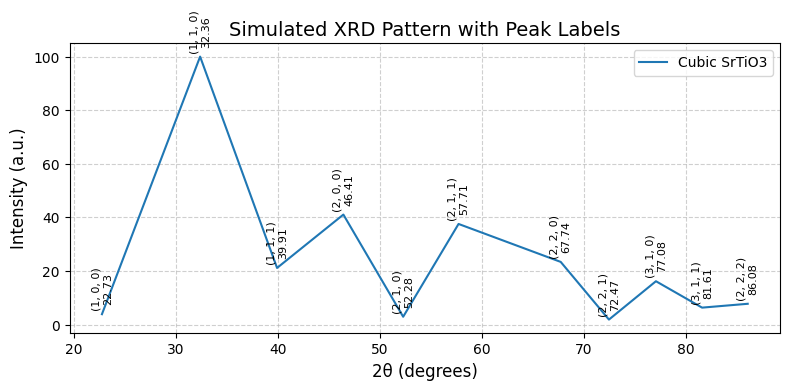

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

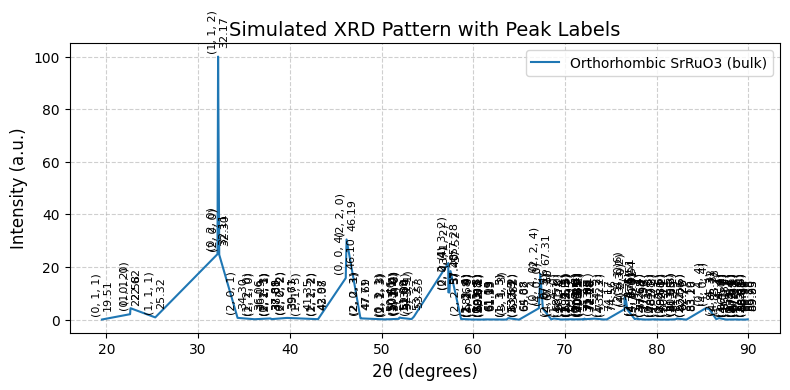

In [22]:
api_key = 'fpkmDzflX03EpKg0aOsda6u6aLJ7Bkpm'
plot_ref_xrd(api_key=api_key, material_id='mp-5229', label='Cubic SrTiO3') # Cubic SrTiO3
plot_ref_xrd(api_key=api_key, material_id='mp-22390', label='Orthorhombic SrRuO3 (bulk)') # Orthorhombic SrRuO3

### 2.2 Find Peaks

In [23]:
for i, (X, Y, sample_name) in enumerate(zip(Xs, Ys, sample_names)):
    peak_x, peak_y = detect_peaks(X, Y, num_peaks=2, prominence=0.1, distance=None)
    print(peak_x, peak_y)

[46.4721, 45.912099999999995] [2568384.659090909, 101747.72727272728]
[46.4721, 45.912099999999995] [5478935.795454546, 146346.5909090909]
[46.4721, 45.912099999999995] [4234064.7727272725, 175297.1590909091]
[46.4721, 45.912099999999995] [3027654.5454545454, 180489.77272727274]
[46.4721, 45.8921] [6168907.386363637, 208056.25]


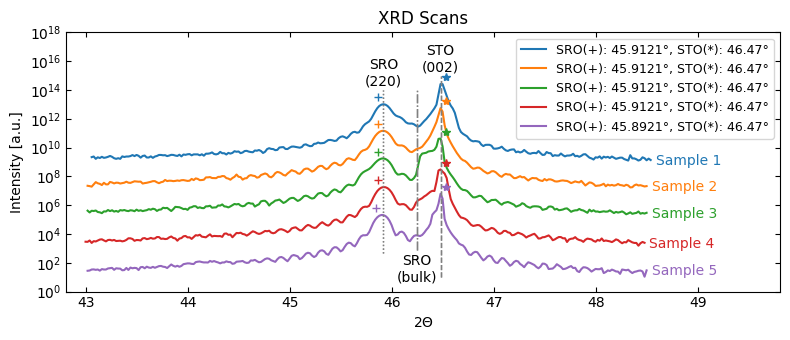

In [24]:
Xs_aligned, Ys_aligned = align_peak_to_value(Xs, Ys, STO_x_peak, viz=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 3.5))
diff = 1e2
plot_xrd((Xs_aligned, Ys_aligned, length_list), sample_names, title='XRD Scans', xrange=(42.8, 49.8), yrange=(1, 1e18), diff=diff, fig=fig, ax=ax, legend_style='label', text_offset_ratio=(1.001, 0.45))

line_style = {'color': 'gray', 'linestyle': 'dashed', 'linewidth': 1}
draw_lines(ax, x_values=[STO_x_peak, STO_x_peak], y_values=[1e1, 1e15], style=line_style)
ax.text(STO_x_peak, 2e15, 'STO\n(002)', fontsize=10, ha='center')

ax.text(45.9121, 2e14, 'SRO\n(220)', fontsize=10, ha='center')
line_style = {'color': 'gray', 'linestyle': 'dotted', 'linewidth': 1}
draw_lines(ax, x_values=[45.9121, 45.9121], y_values=[5e2, 1e14], style=line_style)

ax.text(SRO_bulk_x_peak, 5, 'SRO\n(bulk)', fontsize=10, ha='center')
line_style = {'color': 'gray', 'linestyle': 'dashdot', 'linewidth': 1}
draw_lines(ax, x_values=[SRO_bulk_x_peak, SRO_bulk_x_peak], y_values=[8e2, 1e14], style=line_style)

legend = []
for i, (X, Y, sample_name, color) in enumerate(zip(Xs_aligned, Ys_aligned, sample_names, colors)):
    peak_x, peak_y = detect_peaks(X, Y, num_peaks=2, prominence=0.1, distance=None)

    # Prepare legend item
    legend_item = f'SRO(+): {peak_x[1]:.4f}°, STO(*): {peak_x[0]:.4}°'
    legend.append(legend_item)
    
    peak_y = np.array(peak_y)*diff**(len(Ys)-i-1)
    plt.plot(peak_x[0]+0.05, peak_y[0]*3, '*', color=color)
    plt.plot(peak_x[1]-0.05, peak_y[1]*3, '+', color=color)
    
plt.legend(legend, fontsize=9, loc='upper right')
plt.tight_layout()
plt.show()

### 2.3 Full Width at Half Maximum (FWHM) 

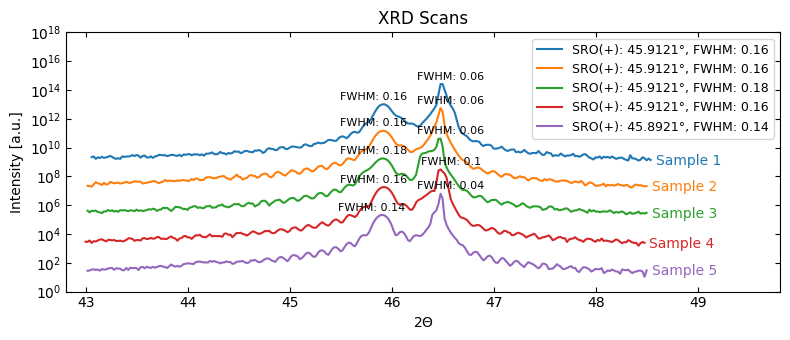

In [25]:
Xs, Ys = align_peak_to_value(Xs, Ys, STO_x_peak, viz=False)

fig, ax = plt.subplots(1, 1, figsize=(8, 3.5))
diff = 1e2

plot_xrd((Xs, Ys, length_list), sample_names, title='XRD Scans', 
         xrange=(42.8, 49.8), yrange=(1, 1e18), diff=diff, 
         fig=fig, ax=ax, legend_style='label', text_offset_ratio=(1.001, 0.45))

legend = []
for i, (X, Y, sample_name, color) in enumerate(zip(Xs, Ys, sample_names, colors)):
    # Detect peaks
    peak_x, peak_y = detect_peaks(X, Y, num_peaks=2, prominence=0.1, distance=None)
    
    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    fwhm_sto, y_fwhm_sto, x_left_sto, x_right_sto = calculate_fwhm(X, Y, peak_x[0])
    fwhm_sro, y_fwhm_sro, x_left_sro, x_right_sro = calculate_fwhm(X, Y, peak_x[1])

    # Prepare legend item
    legend_item = f'SRO(+): {peak_x[1]:.4f}°, STO(*): {peak_x[0]:.4}°'
    legend_item = f'SRO(+): {peak_x[1]:.4f}°, FWHM: {fwhm_sro:.2f}'
    legend.append(legend_item)

    # Adjust y-values for plotting
    peak_y = np.array(peak_y) * diff ** (len(Ys) - i - 1)

    # Draw FWHM arrows for both peaks
    ax.text(peak_x[0]+0.1, peak_y[0] * 2, f'FWHM: {fwhm_sto:.2}',
            ha='center', fontsize=8)
    ax.text(peak_x[1]-0.1, peak_y[1] * 2, f'FWHM: {fwhm_sro:.2f}',
            ha='center', fontsize=8)

# Add legend and adjust layout
plt.legend(legend, fontsize=9)
plt.tight_layout()
plt.show()

### 2.4 Summarized XRD scans

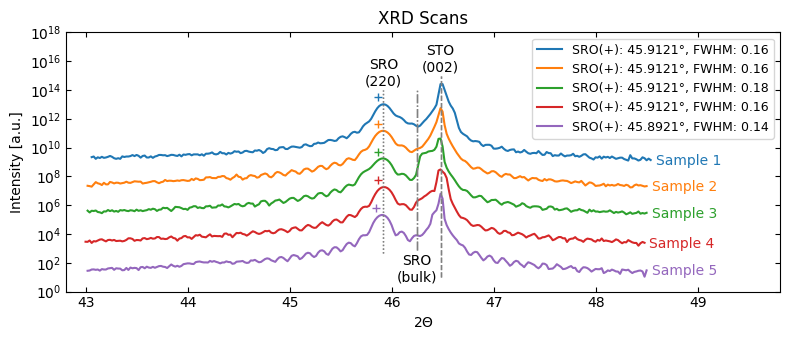

In [26]:
Xs_aligned, Ys_aligned = align_peak_to_value(Xs, Ys, STO_x_peak, viz=False)

fig, ax = layout_fig(graph=1, mod=1, figsize=(8, 3.5), layout='tight')
diff = 1e2
plot_xrd((Xs_aligned, Ys_aligned, length_list), sample_names, title='XRD Scans', xrange=(42.8, 49.8), yrange=(1, 1e18), diff=diff, fig=fig, ax=ax, legend_style='label', text_offset_ratio=(1.001, 0.45))

line_style = {'color': 'gray', 'linestyle': 'dashed', 'linewidth': 1}
draw_lines(ax, x_values=[STO_x_peak, STO_x_peak], y_values=[1e1, 1e15], style=line_style)
ax.text(STO_x_peak, 2e15, 'STO\n(002)', fontsize=10, ha='center')

ax.text(45.9121, 2e14, 'SRO\n(220)', fontsize=10, ha='center')
line_style = {'color': 'gray', 'linestyle': 'dotted', 'linewidth': 1}
draw_lines(ax, x_values=[45.9121, 45.9121], y_values=[5e2, 1e14], style=line_style)

ax.text(SRO_bulk_x_peak, 5, 'SRO\n(bulk)', fontsize=10, ha='center')
line_style = {'color': 'gray', 'linestyle': 'dashdot', 'linewidth': 1}
draw_lines(ax, x_values=[SRO_bulk_x_peak, SRO_bulk_x_peak], y_values=[8e2, 1e14], style=line_style)

legend = []
for i, (X, Y, sample_name, color) in enumerate(zip(Xs_aligned, Ys_aligned, sample_names, colors)):
    peak_x, peak_y = detect_peaks(X, Y, num_peaks=2, prominence=0.1, distance=None)

    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    fwhm_sto, y_fwhm_sto, x_left_sto, x_right_sto = calculate_fwhm(X, Y, peak_x[0])
    fwhm_sro, y_fwhm_sro, x_left_sro, x_right_sro = calculate_fwhm(X, Y, peak_x[1])

    # Prepare legend item
    legend_item = f'SRO(+): {peak_x[1]:.4f}°, STO(*): {peak_x[0]:.4}°'
    legend_item = f'SRO(+): {peak_x[1]:.4f}°, FWHM: {fwhm_sro:.2f}'
    legend.append(legend_item)
    
    peak_y = np.array(peak_y)*diff**(len(Ys)-i-1)
    # plt.plot(peak_x[0], peak_y[0]*3, '*', color=color)
    plt.plot(peak_x[1]-0.05, peak_y[1]*3, '+', color=color)
    
plt.legend(legend, fontsize=9, loc='upper right')
plt.tight_layout()
plt.savefig('../figures/s3_XRD_Scans.png', dpi=600)
plt.savefig('../figures/s3_XRD_Scans.svg', dpi=600)
plt.show()

Fig. s3 X-ray diffraction scans of SrRuO3 samples in the range of 43 - 48.5 degrees in 2θ angle, which is the desired range to evaluate bottom SrTiO3 substrate and SrRuO3 thin film.

## 3. Reciprocal Space Mapping (RSM)

In [64]:
from skimage.feature import peak_local_max

files = ['../data/XRD_RSM/YG065/YG065_RSM slow 3 degree_1.xrdml',
         '../data/XRD_RSM/YG066/YG066 STO 103 phi 94.64 RSM slow 3 degree_1.xrdml',
         '../data/XRD_RSM/YG067/YG067 STO 103 phi_-3.77 RSM slow 3 degree_1 1.xrdml',
         '../data/XRD_RSM/YG068/YG068 STO 103 RSM phi at -176 slow 3 degree_1.xrdml',
         '../data/XRD_RSM/YG069/YG069 STO 103 RSM phi at -88.75 slow 3 degree_1.xrdml',
         '../data/XRD_RSM/YG063/YCG_063 RSM 103 phi-1.35 slow 3 degree_1.xrdml']
sample_names = ['Sample 1', 'Sample 2', 'Sample 3', 'Sample 4', 'Sample 5', 'Sample X']

plot_params = {
    "reciprocal_space": True,
    'title': None,
    'figsize': None, 
    "cmap": plt.cm.viridis,
    "xlim": (1.572, 1.64),
    "ylim": (4.72, 4.86),
    "fontsize": 8,
    "log_scale": True,
    "cbar_value_format": 'actual',
    "cbar_levels": 20,
    "cbar_ticks": 10,
    "cbar_size": 8, 
    "cbar_fraction": 0.05,
    "cbar_pad":  0.02,
    'show_xaxis': 'last',
    'show_yaxis': 'first',
    "vmin": 3,
    "vmax": 1000,
    'custom_bg_color': None,
    'save_path': None,
}
plotter = RSMPlotter(plot_params)

In [79]:
width_margin, height_margin = 0.12, 0.6
y_start, row_heights = 0, [2.3, 1.4, 1.3]
first_row_y, first_row_width, first_row_height = y_start, 0.9, row_heights[0]
second_row_y, second_row_width, second_row_height = y_start+height_margin+row_heights[0], 0.9, row_heights[1]
third_row_y, third_row_width, third_row_height = y_start+height_margin*2+row_heights[0]+row_heights[1], 6, row_heights[2]
margin_pts = 5

subfigures_dict = {
                    '1_1': {"position": [0, first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts}, # [left, bottom, width, height]
                    '1_2': {"position": [(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '1_3': {"position": [2*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '1_4': {"position": [3*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '1_5': {"position": [4*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '1_6': {"position": [5*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '1_7': {"position": [6*(first_row_width+width_margin), first_row_y, 0.12, first_row_height], 'skip_margin': True, 'margin_pts':margin_pts},

                    '2_1': {"position": [0, second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '2_2': {"position": [(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '2_3': {"position": [2*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '2_4': {"position": [3*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '2_5': {"position": [4*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    '2_6': {"position": [5*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':margin_pts},

                    '3_1': {"position": [0, third_row_y, third_row_width, third_row_height], 'skip_margin': True, 'margin_pts':margin_pts},
                    }
for key, value in subfigures_dict.items():
    subfigures_dict[key]["position"] = convert_top_left_origin_to_matplotlib(value["position"], fig)
# fig, axes_dict = layout_subfigures_inches((8,6), subfigures_dict)

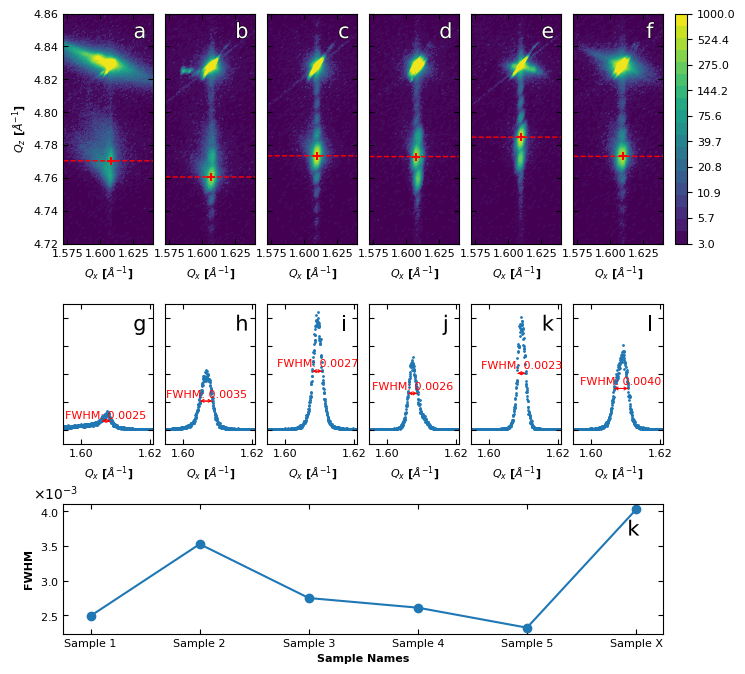

In [80]:
n_plot_fisrt_row = 7
n_plot_second_row = 6

FWHM_list = []
fig, axes_dict = layout_subfigures_inches((8,6), subfigures_dict)
axes = list(axes_dict.values())

for i, (ax, file, title) in enumerate(zip(axes[:len(files)], files, sample_names)):
    
# Draw RSMs
    Qx, Qz, intensity = plotter.plot(file, fig, axes[:n_plot_fisrt_row], ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')

# Mark peaks with red '+' and draw a horizontal line
    # Mark peaks with red '+'
    coordinates = peak_local_max(intensity, min_distance=20, threshold_abs=80, num_peaks=10)
    coordinates_target = []
    for j, z in enumerate(Qz[coordinates[:, 0], coordinates[:, 1]]):
        if z < 4.8:
            coordinates_target.append(coordinates[j])
    coordinates_target = np.array(coordinates_target)[:1]
    Qx_target, Qz_target = Qx[coordinates_target[:, 0], coordinates_target[:, 1]], Qz[coordinates_target[:, 0], coordinates_target[:, 1]]
    ax.scatter(Qx_target, Qz_target, marker='+', color='red')  # Mark peaks with red '+'
    
    # extract line profile at Qz_target
    mask = np.isclose(Qz, Qz_target, atol=1e-3)  # Boolean mask
    Qx_line = Qx[mask]
    intensity_line = intensity[mask]
    # sort the Qx_line and intensity_line based on Qx values
    Qx_index = np.argsort(Qx_line)
    Qx_line = Qx_line[Qx_index]
    intensity_line = intensity_line[Qx_index]
    
    Qz_line = np.ones_like(Qx_line) * Qz_target[0]
    ax.plot(Qx_line, Qz_line, 'r--', lw=1)
    
# plot the line profile and mark the peak, FWHM
    ax = axes[i+n_plot_fisrt_row] # change to second row
    ax.scatter(Qx_line, intensity_line, s=1)

    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    peak_x, peak_y = detect_peaks(Qx_line, intensity_line, num_peaks=1, prominence=0.1, distance=None)
    fwhm, y_fwhm, x_left, x_right = calculate_fwhm(Qx_line, intensity_line, peak_x[0])
    FWHM_list.append(fwhm)

# Draw FWHM arrows for both peaks
    ax.plot([x_left, x_right], [y_fwhm, y_fwhm], 'r-', lw=0.5)  # 'k-' is for black line
    # No shrink at the starting point and ending point and Controls arrowhead size
    ax.annotate('', xy=(x_right, y_fwhm), xytext=(x_left, y_fwhm),
                arrowprops=dict(arrowstyle='<->', lw=0.8, color='r', shrinkA=0,  shrinkB=0, mutation_scale=5))
    ax.text((x_left + x_right) / 2, y_fwhm*1.05, f'FWHM: {fwhm:.4f}', ha='center', va='bottom', color='r', fontsize=8)
    ax.set_ylim(-100, 900)
    ax.set_xlim(1.595, 1.621)
    
    ax.tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
    ax.tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12))       
    ax.set_xlabel(r'$Q_x$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    ax.set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    labelfigs(ax, i+n_plot_fisrt_row-1, size=15, inset_fraction=(0.15, 0.15), loc='tr', style='bw')
    
    # adjust the yticks and ylabel for the line profile plots
axes[n_plot_fisrt_row].set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12))
for ax in axes[7:-1]: # start from second ax in the second row
    ax.set_yticklabels([])
    ax.set_ylabel('')

# plot the trend of FWHM
axes[-1].plot(sample_names, FWHM_list, marker='o')
axes[-1].set_xlabel('Sample Names', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
axes[-1].set_ylabel(r'FWHM', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
axes[-1].tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
axes[-1].tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12)) 
labelfigs(axes[-1], 10, size=15, inset_fraction=(0.2, 0.05), loc='tr', style='bw')
    
# Set the y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)  # Use MathText for cleaner output
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((1, 10))  # Set when to switch to scientific notation
axes[-1].yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis
axes[-1].yaxis.get_offset_text().set_x(-0.05)  # Set horizontal position (relative to the axis)

plt.savefig('../figures/1_RSM_Analysis.png', dpi=1000, bbox_inches='tight')
plt.savefig('../figures/1_RSM_Analysis.svg', dpi=1000, bbox_inches='tight')
plt.show()

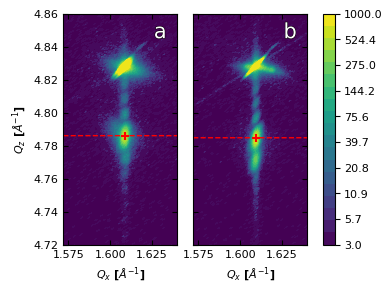

In [57]:
files = ['../data/XRD_RSM/YG063\\YCG_063 RSM 103 phi-272.45 slow 3 degree_1.xrdml',
         '../data/XRD_RSM/YG069/YG069 STO 103 RSM phi at -88.75 slow 3 degree_1.xrdml']
sample_names = ['Sample 5', 'Sample X']

graph, mod = 3, 3
width_ratios = [1, 1, 0.1]
Qx_lines, intensity_lines = [], []

fig, axes = layout_fig(graph=graph, mod=mod, figsize=(3.5, 3), subplot_style='gridspec', width_ratios=width_ratios, spacing=(0.2, 0.2), layout='tight')
for i, (ax, file, title) in enumerate(zip(axes, files, sample_names)):
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')

# Mark peaks with red '+' 
    # Mark peaks with red '+'
    coordinates = peak_local_max(intensity, min_distance=20, threshold_abs=80, num_peaks=10)
    coordinates_target = []
    for j, z in enumerate(Qz[coordinates[:, 0], coordinates[:, 1]]):
        if z < 4.8:
            coordinates_target.append(coordinates[j])
    coordinates_target = np.array(coordinates_target)[:1]
    Qx_target, Qz_target = Qx[coordinates_target[:, 0], coordinates_target[:, 1]], Qz[coordinates_target[:, 0], coordinates_target[:, 1]]
    ax.scatter(Qx_target, Qz_target, marker='+', color='red')  # Mark peaks with red '+'
    
# draw a horizontal line
    # extract line profile at Qz_target
    mask = np.isclose(Qz, Qz_target, atol=1e-3)  # Boolean mask
    Qx_line = Qx[mask]
    intensity_line = intensity[mask]
    # sort the Qx_line and intensity_line based on Qx values
    Qx_index = np.argsort(Qx_line)
    Qx_line = Qx_line[Qx_index]
    intensity_line = intensity_line[Qx_index]
    
    Qz_line = np.ones_like(Qx_line) * Qz_target[0]
    ax.plot(Qx_line, Qz_line, 'r--', lw=1)
    
    Qx_lines.append(Qx_line)
    intensity_lines.append(intensity_line)

plt.show()

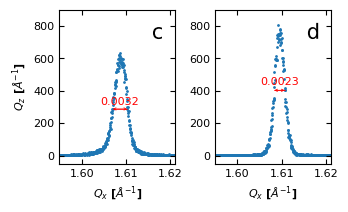

In [58]:
FWHM_list = []

fig, axes = layout_fig(graph=len(files), mod=2, figsize=(3.5, 2), subplot_style='gridspec', spacing=(0.35, 0.1), layout='tight')
for i, (ax, Qx_line, intensity_line) in enumerate(zip(axes, Qx_lines, intensity_lines)):
    ax.scatter(Qx_line, intensity_line, s=1)

    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    peak_x, peak_y = detect_peaks(Qx_line, intensity_line, num_peaks=1, prominence=0.1, distance=None)
    fwhm, y_fwhm, x_left, x_right = calculate_fwhm(Qx_line, intensity_line, peak_x[0])

    # Draw FWHM arrows for both peaks
    ax.plot([x_left, x_right], [y_fwhm, y_fwhm], 'r-', lw=0.5)  # 'k-' is for black line
    # No shrink at the starting point and ending point and Controls arrowhead size
    ax.annotate('', xy=(x_right, y_fwhm), xytext=(x_left, y_fwhm),
                arrowprops=dict(arrowstyle='<->', lw=0.6, color='r', shrinkA=0,  shrinkB=0, mutation_scale=4))
    ax.text((x_left + x_right) / 2, y_fwhm*1.05, f'{fwhm:.4f}', ha='center', va='bottom', color='r', fontsize=8)
    
    ax.set_xlim(1.595, 1.621)
    ax.set_ylim(-50, 900)
    ax.tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
    ax.tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12))     
    ax.set_xlabel(r'$Q_x$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    labelfigs(ax, i+2, size=15, inset_fraction=(0.15, 0.15), loc='tr', style='bw')
    
    FWHM_list.append(fwhm)
    
axes[0].set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
# plt.savefig('../figures/2_RSMs_SRO_FWHM.png', dpi=600, bbox_inches='tight')
# plt.savefig('../figures/2_RSMs_SRO_FWHM.svg', dpi=600, bbox_inches='tight')
plt.show()

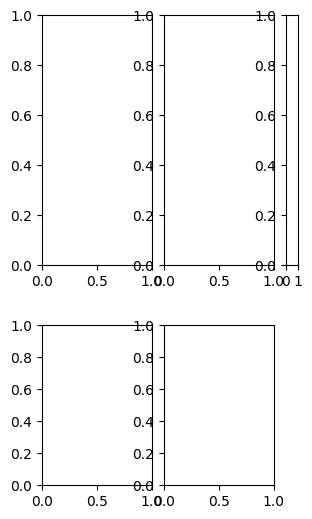

In [59]:
width_margin = 0.12
first_row_y, first_row_width, first_row_height = 0, 1.1, 2.5
second_row_y, second_row_width, second_row_height = 3.1, 1.1, 1.6

subfigures_dict = {
                    '1_1': {"position": [0, first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5}, # [left, bottom, width, height]
                    '1_2': {"position": [(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5},
                    '1_6': {"position": [2*(first_row_width+width_margin), first_row_y, 0.12, first_row_height], 'skip_margin': True, 'margin_pts':5},

                    '2_1': {"position": [0, second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},
                    '2_2': {"position": [(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},

                    }
for key, value in subfigures_dict.items():
    subfigures_dict[key]["position"] = convert_top_left_origin_to_matplotlib(value["position"], fig)
fig, axes_dict = layout_subfigures_inches((4, 4.5), subfigures_dict)

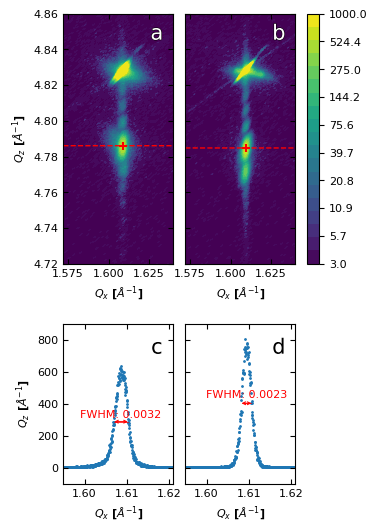

In [60]:
fig, axes_dict = layout_subfigures_inches((4,4.56), subfigures_dict)
axes = list(axes_dict.values())

for i, (ax, file, title) in enumerate(zip(axes[:len(files)], files, sample_names)):
    
# Draw RSMs
    Qx, Qz, intensity = plotter.plot(file, fig, axes[:3], ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')

# Mark peaks with red '+' and draw a horizontal line
    # Mark peaks with red '+'
    coordinates = peak_local_max(intensity, min_distance=20, threshold_abs=80, num_peaks=10)
    coordinates_target = []
    for j, z in enumerate(Qz[coordinates[:, 0], coordinates[:, 1]]):
        if z < 4.8:
            coordinates_target.append(coordinates[j])
    coordinates_target = np.array(coordinates_target)[:1]
    Qx_target, Qz_target = Qx[coordinates_target[:, 0], coordinates_target[:, 1]], Qz[coordinates_target[:, 0], coordinates_target[:, 1]]
    ax.scatter(Qx_target, Qz_target, marker='+', color='red')  # Mark peaks with red '+'
    
    # extract line profile at Qz_target
    mask = np.isclose(Qz, Qz_target, atol=1e-3)  # Boolean mask
    Qx_line = Qx[mask]
    intensity_line = intensity[mask]
    # sort the Qx_line and intensity_line based on Qx values
    Qx_index = np.argsort(Qx_line)
    Qx_line = Qx_line[Qx_index]
    intensity_line = intensity_line[Qx_index]
    
    Qz_line = np.ones_like(Qx_line) * Qz_target[0]
    ax.plot(Qx_line, Qz_line, 'r--', lw=1)
    
# plot the line profile and mark the peak, FWHM
    ax = axes[i+3] # change to second row
    ax.scatter(Qx_line, intensity_line, s=1)

    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    peak_x, peak_y = detect_peaks(Qx_line, intensity_line, num_peaks=1, prominence=0.1, distance=None)
    fwhm, y_fwhm, x_left, x_right = calculate_fwhm(Qx_line, intensity_line, peak_x[0])

# Draw FWHM arrows for both peaks
    ax.plot([x_left, x_right], [y_fwhm, y_fwhm], 'r-', lw=0.5)  # 'k-' is for black line
    # No shrink at the starting point and ending point and Controls arrowhead size
    ax.annotate('', xy=(x_right, y_fwhm), xytext=(x_left, y_fwhm),
                arrowprops=dict(arrowstyle='<->', lw=0.8, color='r', shrinkA=0,  shrinkB=0, mutation_scale=5))
    ax.text((x_left + x_right) / 2, y_fwhm*1.05, f'FWHM: {fwhm:.4f}', ha='center', va='bottom', color='r', fontsize=8)
    ax.set_ylim(-100, 900)
    ax.set_xlim(1.595, 1.621)
    
    ax.tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
    ax.tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12))       
    ax.set_xlabel(r'$Q_x$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    ax.set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    labelfigs(ax, i+2, size=15, inset_fraction=(0.15, 0.15), loc='tr', style='bw')
    
    # adjust the yticks and ylabel for the line profile plots
axes[3].set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12))
axes[4].set_yticklabels([])
axes[4].set_ylabel('')

# plt.savefig('../figures/2_RSM_Analysis.png', dpi=1000, bbox_inches='tight')
# plt.savefig('../figures/2_RSM_Analysis.svg', dpi=1000, bbox_inches='tight')
plt.show()

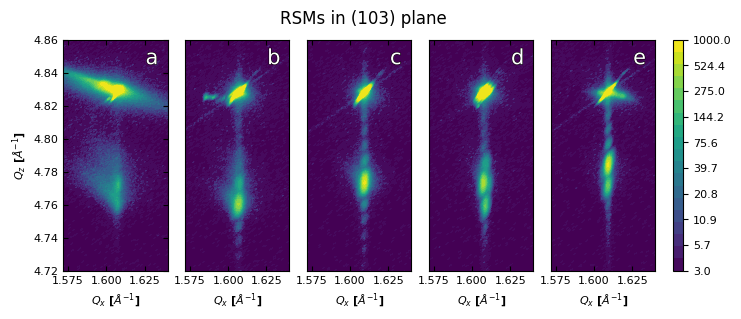

In [92]:
graph, mod = 6, 6
width_ratios = [1, 1, 1, 1, 1, 0.1]
fig, axes = layout_fig(graph=graph, mod=mod, figsize=(8, 3), subplot_style='gridspec', width_ratios=width_ratios, spacing=(0.2, 0.2), layout='tight')
for i, (ax, file, title) in enumerate(zip(axes, files, sample_names)):
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('RSMs in (103) plane')
# plt.savefig('../figures/1_RSMs_plain.png', dpi=300, bbox_inches='tight')
plt.show()

### 3.2 Full Width at Half Maximum (FWHM) 

#### 3.2.1 Line profile along the RSM peaks

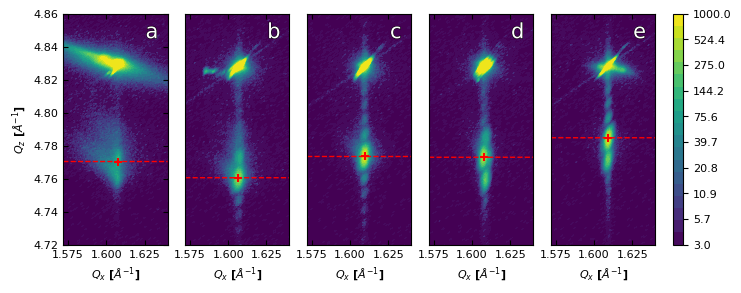

In [93]:
graph, mod = 6, 6
width_ratios = [1, 1, 1, 1, 1, 0.1]
fig, axes = layout_fig(graph=graph, mod=mod, figsize=(8, 3), subplot_style='gridspec', 
                       width_ratios=width_ratios, spacing=(0.2, 0.2), layout='tight')
Qx_lines, intensity_lines = [], []
for i, (ax, file, title) in enumerate(zip(axes[:len(files)], files, sample_names)):
    
# Draw RSMs
    Qx, Qz, intensity = plotter.plot(file, fig, axes[:mod], ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')

# Mark peaks with red '+' 
    # Mark peaks with red '+'
    coordinates = peak_local_max(intensity, min_distance=20, threshold_abs=80, num_peaks=10)
    coordinates_target = []
    for j, z in enumerate(Qz[coordinates[:, 0], coordinates[:, 1]]):
        if z < 4.8:
            coordinates_target.append(coordinates[j])
    coordinates_target = np.array(coordinates_target)[:1]
    Qx_target, Qz_target = Qx[coordinates_target[:, 0], coordinates_target[:, 1]], Qz[coordinates_target[:, 0], coordinates_target[:, 1]]
    ax.scatter(Qx_target, Qz_target, marker='+', color='red')  # Mark peaks with red '+'
    
# draw a horizontal line
    # extract line profile at Qz_target
    mask = np.isclose(Qz, Qz_target, atol=1e-3)  # Boolean mask
    Qx_line = Qx[mask]
    intensity_line = intensity[mask]
    # sort the Qx_line and intensity_line based on Qx values
    Qx_index = np.argsort(Qx_line)
    Qx_line = Qx_line[Qx_index]
    intensity_line = intensity_line[Qx_index]
    
    Qz_line = np.ones_like(Qx_line) * Qz_target[0]
    ax.plot(Qx_line, Qz_line, 'r--', lw=1)
    
    Qx_lines.append(Qx_line)
    intensity_lines.append(intensity_line)

# plt.suptitle('RSMs in (103) plane')
plt.savefig('../figures/2_RSMs_SRO_peak.png', dpi=600, bbox_inches='tight')
plt.savefig('../figures/2_RSMs_SRO_peak.svg', dpi=600, bbox_inches='tight')
plt.show()

Fig. 2 Reciprocal Space Mappings (RSMs) visualization and analysis.
$\mathbf{a-e}$ RSMs visualization for 5 samples along the (103) direction. Prefered Q_x and Q_z regions are cropped for better visualization. Peaks for SRO is labeled with red "+" mark while the horizontal line drawed along marked peak. 

#### 3.2.2 Diffraction intensity along peak line profiles

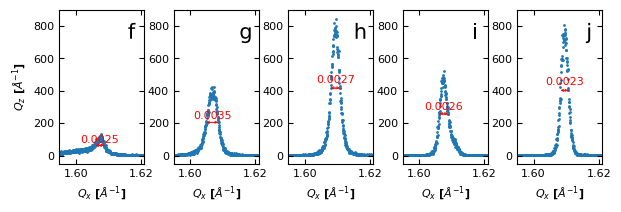

In [5]:
FWHM_list = []

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(7, 2), subplot_style='gridspec', spacing=(0.35, 0.1), layout='tight')
for i, (ax, Qx_line, intensity_line) in enumerate(zip(axes, Qx_lines, intensity_lines)):
    ax.scatter(Qx_line, intensity_line, s=1)

    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    peak_x, peak_y = detect_peaks(Qx_line, intensity_line, num_peaks=1, prominence=0.1, distance=None)
    fwhm, y_fwhm, x_left, x_right = calculate_fwhm(Qx_line, intensity_line, peak_x[0])

    # Draw FWHM arrows for both peaks
    ax.plot([x_left, x_right], [y_fwhm, y_fwhm], 'r-', lw=0.5)  # 'k-' is for black line
    # No shrink at the starting point and ending point and Controls arrowhead size
    ax.annotate('', xy=(x_right, y_fwhm), xytext=(x_left, y_fwhm),
                arrowprops=dict(arrowstyle='<->', lw=0.6, color='r', shrinkA=0,  shrinkB=0, mutation_scale=4))
    ax.text((x_left + x_right) / 2, y_fwhm*1.05, f'{fwhm:.4f}', ha='center', va='bottom', color='r', fontsize=8)
    
    ax.set_xlim(1.595, 1.621)
    ax.set_ylim(-50, 900)
    ax.tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
    ax.tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12))     
    ax.set_xlabel(r'$Q_x$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    labelfigs(ax, i+5, size=15, inset_fraction=(0.15, 0.15), loc='tr', style='bw')
    
    FWHM_list.append(fwhm)
    
axes[0].set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
plt.savefig('../figures/2_RSMs_SRO_FWHM.png', dpi=600, bbox_inches='tight')
plt.savefig('../figures/2_RSMs_SRO_FWHM.svg', dpi=600, bbox_inches='tight')
plt.show()

Fig. 2 Reciprocal Space Mappings (RSMs) visualization and analysis.
$\mathbf{f-j}$ Line profile alone the RSM peaks horizontally for sample 1-5, respectively. 

#### 3.2.3 FWHM trend

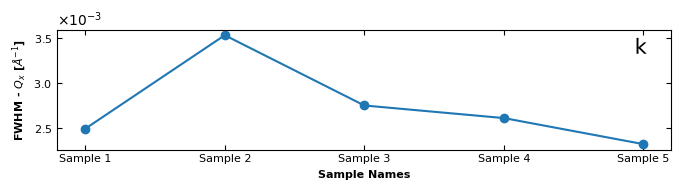

In [ ]:
fig, ax = layout_fig(graph=1, mod=1, figsize=(7, 2), layout='tight')

ax.plot(sample_names, FWHM_list, marker='o')
labelfigs(ax, 10, size=15, inset_fraction=(0.15, 0.05), loc='tr', style='bw')

ax.set_xlabel('Sample Names', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
ax.set_ylabel(r'FWHM - $Q_x$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
ax.tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
ax.tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12))    
    
# Set the y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)  # Use MathText for cleaner output
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((1, 10))  # Set when to switch to scientific notation
ax.yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis

plt.tight_layout()
plt.savefig('../figures/2_RSMs_SRO_FWHM_trend.png', dpi=600, bbox_inches='tight')
plt.savefig('../figures/2_RSMs_SRO_FWHM_trend.svg', dpi=600, bbox_inches='tight')
plt.show()

Fig. 2 Reciprocal Space Mappings (RSMs) visualization and analysis.
$\mathbf{k}$ FWHM line plot for samples differences.

#### 3.2.4 Summary plot of RSMs

In [89]:
width_margin = 0.12
first_row_y, first_row_width, first_row_height = 0, 1.1, 2.5
second_row_y, second_row_width, second_row_height = 3.1, 1.1, 1.6
third_row_y, third_row_width, third_row_height = 5.3, 6, 1.3

subfigures_dict = {
                    '1_1': {"position": [0, first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5}, # [left, bottom, width, height]
                    '1_2': {"position": [(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5},
                    '1_3': {"position": [2*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5},
                    '1_4': {"position": [3*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5},
                    '1_5': {"position": [4*(first_row_width+width_margin), first_row_y, first_row_width, first_row_height], 'skip_margin': True, 'margin_pts':5},
                    '1_6': {"position": [5*(first_row_width+width_margin), first_row_y, 0.12, first_row_height], 'skip_margin': True, 'margin_pts':5},

                    '2_1': {"position": [0, second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},
                    '2_2': {"position": [(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},
                    '2_3': {"position": [2*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},
                    '2_4': {"position": [3*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},
                    '2_5': {"position": [4*(second_row_width+width_margin), second_row_y, second_row_width, second_row_height], 'skip_margin': True, 'margin_pts':5},

                    '3_1': {"position": [0, third_row_y, third_row_width, third_row_height], 'skip_margin': True, 'margin_pts':5},
                    }
for key, value in subfigures_dict.items():
    subfigures_dict[key]["position"] = convert_top_left_origin_to_matplotlib(value["position"], fig)
# fig, axes_dict = layout_subfigures_inches((8,6), subfigures_dict)

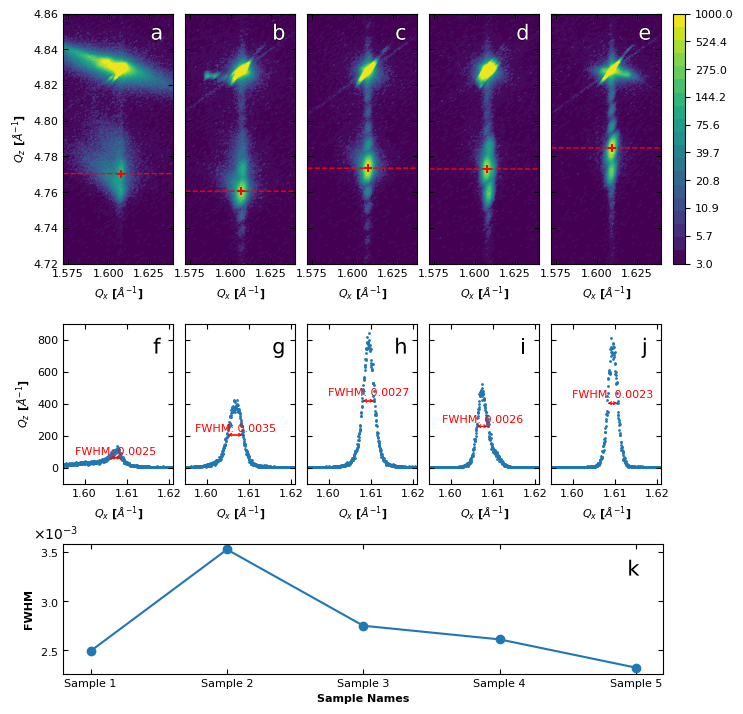

In [96]:
fig, axes_dict = layout_subfigures_inches((8,6), subfigures_dict)
axes = list(axes_dict.values())

for i, (ax, file, title) in enumerate(zip(axes[:len(files)], files, sample_names)):
    
# Draw RSMs
    Qx, Qz, intensity = plotter.plot(file, fig, axes[:6], ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')

# Mark peaks with red '+' and draw a horizontal line
    # Mark peaks with red '+'
    coordinates = peak_local_max(intensity, min_distance=20, threshold_abs=80, num_peaks=10)
    coordinates_target = []
    for j, z in enumerate(Qz[coordinates[:, 0], coordinates[:, 1]]):
        if z < 4.8:
            coordinates_target.append(coordinates[j])
    coordinates_target = np.array(coordinates_target)[:1]
    Qx_target, Qz_target = Qx[coordinates_target[:, 0], coordinates_target[:, 1]], Qz[coordinates_target[:, 0], coordinates_target[:, 1]]
    ax.scatter(Qx_target, Qz_target, marker='+', color='red')  # Mark peaks with red '+'
    
    # extract line profile at Qz_target
    mask = np.isclose(Qz, Qz_target, atol=1e-3)  # Boolean mask
    Qx_line = Qx[mask]
    intensity_line = intensity[mask]
    # sort the Qx_line and intensity_line based on Qx values
    Qx_index = np.argsort(Qx_line)
    Qx_line = Qx_line[Qx_index]
    intensity_line = intensity_line[Qx_index]
    
    Qz_line = np.ones_like(Qx_line) * Qz_target[0]
    ax.plot(Qx_line, Qz_line, 'r--', lw=1)
    
# plot the line profile and mark the peak, FWHM
    ax = axes[i+6] # change to second row
    ax.scatter(Qx_line, intensity_line, s=1)

    # Calculate FWHM for the STO peak (peak_x[0]) and SRO peak (peak_x[1])
    peak_x, peak_y = detect_peaks(Qx_line, intensity_line, num_peaks=1, prominence=0.1, distance=None)
    fwhm, y_fwhm, x_left, x_right = calculate_fwhm(Qx_line, intensity_line, peak_x[0])

# Draw FWHM arrows for both peaks
    ax.plot([x_left, x_right], [y_fwhm, y_fwhm], 'r-', lw=0.5)  # 'k-' is for black line
    # No shrink at the starting point and ending point and Controls arrowhead size
    ax.annotate('', xy=(x_right, y_fwhm), xytext=(x_left, y_fwhm),
                arrowprops=dict(arrowstyle='<->', lw=0.8, color='r', shrinkA=0,  shrinkB=0, mutation_scale=5))
    ax.text((x_left + x_right) / 2, y_fwhm*1.05, f'FWHM: {fwhm:.4f}', ha='center', va='bottom', color='r', fontsize=8)
    ax.set_ylim(-100, 900)
    ax.set_xlim(1.595, 1.621)
    
    ax.tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
    ax.tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12))       
    ax.set_xlabel(r'$Q_x$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    ax.set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
    labelfigs(ax, i+5, size=15, inset_fraction=(0.15, 0.15), loc='tr', style='bw')
    
    # adjust the yticks and ylabel for the line profile plots
axes[6].set_ylabel(r'$Q_z$ [$\AA^{-1}$]', fontsize=plot_params.get("fontsize", 12))
for ax in axes[7:-1]: # start from second ax in the second row
    ax.set_yticklabels([])
    ax.set_ylabel('')

# plot the trend of FWHM
axes[-1].plot(sample_names, FWHM_list, marker='o')
axes[-1].set_xlabel('Sample Names', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
axes[-1].set_ylabel(r'FWHM', fontsize=plot_params.get("fontsize", 12), fontweight='bold')
axes[-1].tick_params(axis="x", direction="in", top=True, labelsize=plot_params.get("fontsize", 12))
axes[-1].tick_params(axis="y", direction="in", right=True, labelsize=plot_params.get("fontsize", 12)) 
labelfigs(axes[-1], 10, size=15, inset_fraction=(0.2, 0.05), loc='tr', style='bw')
    
# Set the y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)  # Use MathText for cleaner output
formatter.set_scientific(True)  # Enable scientific notation
formatter.set_powerlimits((1, 10))  # Set when to switch to scientific notation
axes[-1].yaxis.set_major_formatter(formatter)  # Apply formatter to y-axis
axes[-1].yaxis.get_offset_text().set_x(-0.05)  # Set horizontal position (relative to the axis)

plt.savefig('../figures/2_RSM_Analysis.png', dpi=1000, bbox_inches='tight')
plt.savefig('../figures/2_RSM_Analysis.svg', dpi=1000, bbox_inches='tight')
plt.show()

Fig. 2 Reciprocal space Mapping for 5 samples along the (103) direction. Prefered Q_x and Q_z regions are cropped for better visualization.
$\mathbf{a-e}$ RSMs visualization for 5 samples along the (103) direction. Prefered Q_x and Q_z regions are cropped for better visualization. Peaks for SRO is labeled with red "+" mark while the horizontal line drawed along marked peak. 
$\mathbf{f-j}$ Line profile alone the RSM peaks horizontally for sample 1-5, respectively. 
$\mathbf{k}$ FWHM line plot for samples differences.

### Four angles RSM scans

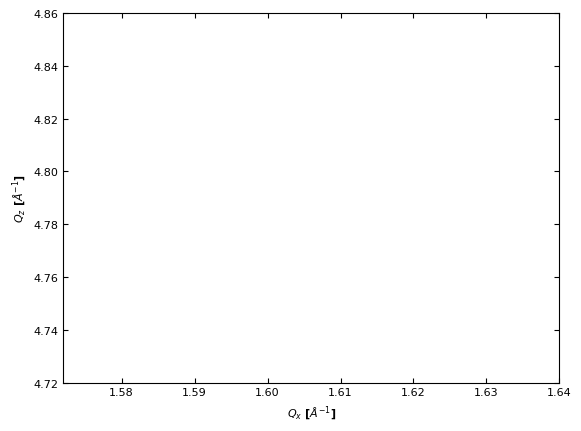

In [11]:
file = '../data/XRD_RSM/YG063/YCG_063 RSM 002 phi-91.57 slow 3 degree_1.xrdml'
Qx, Qz, intensity = plotter.plot(file)
plt.show()

In [55]:
files = [files[i] for i in [0,3,1,2]]
files

['../data/XRD_RSM/YG063\\YCG_063 RSM 103 phi-1.35 slow 3 degree_1.xrdml',
 '../data/XRD_RSM/YG063\\YCG_063 RSM 103 phi-91.57 slow 3 degree_1.xrdml',
 '../data/XRD_RSM/YG063\\YCG_063 RSM 103 phi-182.21 slow 3 degree_1.xrdml',
 '../data/XRD_RSM/YG063\\YCG_063 RSM 103 phi-272.45 slow 3 degree_1.xrdml']

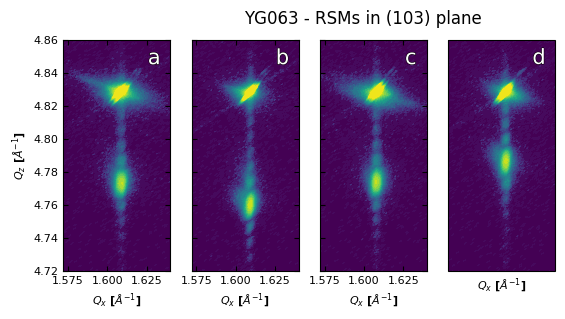

In [56]:
# No RSM scans
files = glob.glob('../data/XRD_RSM/YG063/*RSM*103*.xrdml')
files = [files[i] for i in [0,3,1,2]]

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(8, 3), subplot_style='gridspec', spacing=(0.2, 0.2), layout='tight')
for i, (ax, file) in enumerate(zip(axes, files)):
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('YG063 - RSMs in (103) plane')
# plt.tight_layout()
plt.show()

In [ ]:
# 1 RSM scans
files = glob.glob('../data/XRD_RSM/YG065/YG065_RSM*')
files = [files[i] for i in [2,1,0,3]]

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(8, 3), subplot_style='gridspec', spacing=(0.2, 0.2), layout='tight')
for i, (ax, file) in enumerate(zip(axes, files)):
    pattern = r"phi(?:[_ ]| at )(-?\d+\.?\d*)"
    label = 'phi='+re.search(pattern, file).group(1)
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('RSMs in (103) plane')
# plt.tight_layout()
plt.show()

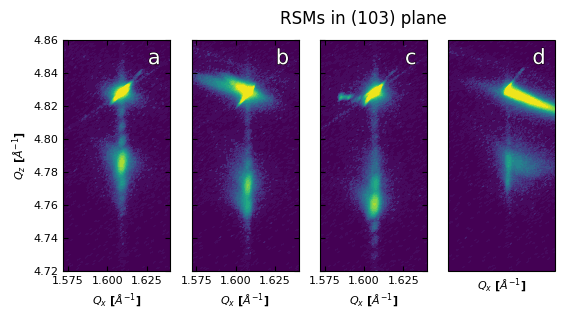

In [23]:
# 4 RSM scans, but need to redo for better result
files = glob.glob('../data/XRD_RSM/YG066/YG066*RSM*.xrdml')
files = [files[i] for i in [1,3,0,2]]

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(8, 3), subplot_style='gridspec', spacing=(0.2, 0.2), layout='tight')
for i, (ax, file) in enumerate(zip(axes, files)):
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('RSMs in (103) plane')
# plt.tight_layout()
plt.show()

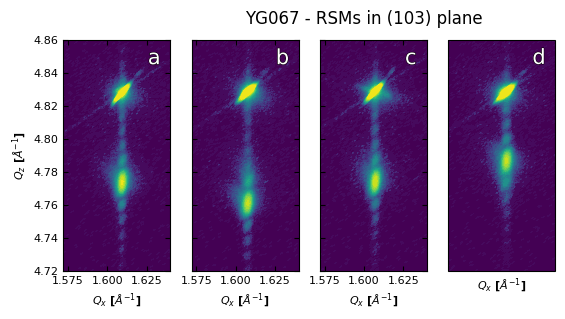

In [6]:
# 4 RSM scans, done
files = glob.glob('../data/XRD_RSM/YG067/YG067*RSM*.xrdml')
files = [files[i] for i in [2,1,0,3]]

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(8, 3), subplot_style='gridspec', spacing=(0.2, 0.2), layout='tight')
for i, (ax, file) in enumerate(zip(axes, files)):
    pattern = r"phi(?:[_ ]| at )(-?\d+\.?\d*)"
    label = 'phi='+re.search(pattern, file).group(1)
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('YG067 - RSMs in (103) plane')
# plt.tight_layout()
plt.show()

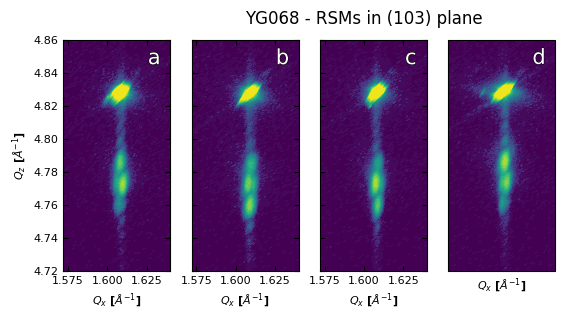

In [7]:
# 4 RSM scans, done
files = glob.glob('../data/XRD_RSM/YG068/YG068*RSM*.xrdml')
files = [files[i] for i in [2,1,0,3]]

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(8, 3), subplot_style='gridspec', spacing=(0.2, 0.2), layout='tight')
for i, (ax, file) in enumerate(zip(axes, files)):
    pattern = r"phi(?:[_ ]| at )(-?\d+\.?\d*)"
    label = 'phi='+re.search(pattern, file).group(1)
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('YG068 - RSMs in (103) plane')
# plt.tight_layout()
plt.show()

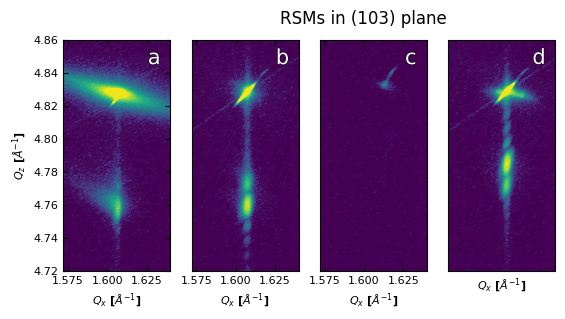

In [17]:
# 4 RSM scans, but need to redo for better result
files = glob.glob('../data/XRD_RSM/YG069/YG069*RSM*.xrdml')
files = [files[i] for i in [2,1,0,3]]

fig, axes = layout_fig(graph=len(files), mod=5, figsize=(8, 3), subplot_style='gridspec', spacing=(0.2, 0.2), layout='tight')
for i, (ax, file) in enumerate(zip(axes, files)):
    pattern = r"phi(?:[_ ]| at )(-?\d+\.?\d*)"
    label = 'phi='+re.search(pattern, file).group(1)
    Qx, Qz, intensity = plotter.plot(file, fig, axes, ax, figsize=None)
    labelfigs(ax, i, size=15, inset_fraction=(0.08, 0.15), loc='tr')
plt.suptitle('RSMs in (103) plane')
# plt.tight_layout()
plt.show()

Fig. s1.1 RSMs in different phi angles. a, b, c, d is 0, 90, 180, 270 degrees, respectively.